In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [31]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3

In [11]:
dataset = tf.keras.utils.image_dataset_from_directory(
    'Plant',
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 9952 files belonging to 7 classes.


In [32]:
len(dataset)

311

In [12]:
CLASS_NAMES = dataset.class_names
CLASS_NAMES

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_healthy']

In [14]:
data_iterator = dataset.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

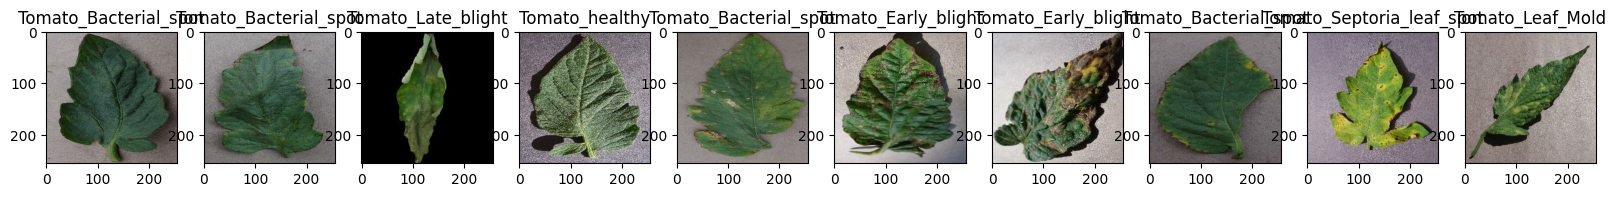

In [16]:
#Tomato_Bacterial_spot = 0
#Tomato_Early_Blight = 1
#Tomato_Late_Blight = 2
#Tomato_Leaf_Mold = 3
#Tomato_Septoria_Leaf_Spot = 4
#Tomato_Spider_Mites_Two_Spotted_Spider_Mites = 5
#Tomato_Healthy = 6
fig, ax = plt.subplots(ncols = 10, figsize = (20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(CLASS_NAMES[batch[1][idx]])

In [17]:
data = dataset.map(lambda x, y: (x/255, y))

In [18]:
scaled_iterator = data.as_numpy_iterator()

In [19]:
batch = scaled_iterator.next()

In [20]:
batch[0].min()

0.0

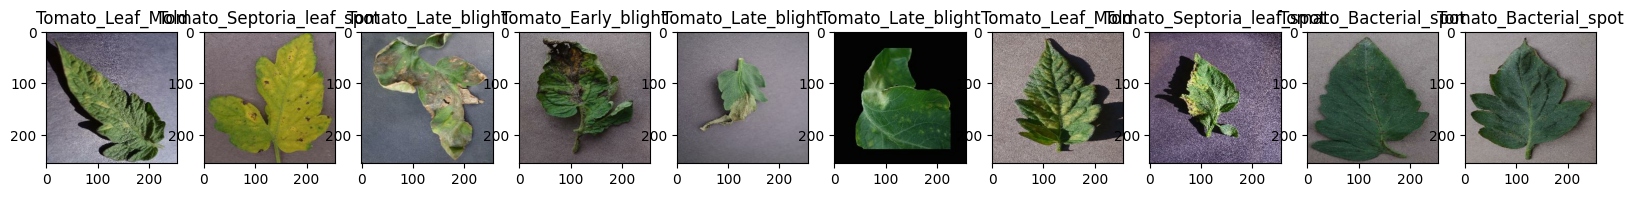

In [21]:
fig, ax = plt.subplots(ncols = 10, figsize = (20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(CLASS_NAMES[batch[1][idx]])

In [22]:
#train test split
train_size = int(len(dataset)*.8)
val_size = int(len(dataset)*.1)+1
test_size = int(len(dataset)*.1)
train_size

248

In [23]:
train = dataset.take(train_size)
validation = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size+val_size).take(test_size)

In [24]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [25]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [26]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [27]:
n_classes = 7
model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [30]:
history = model.fit(
    train,
    epochs = 50,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data=validation
)

Epoch 1/50
248/248 [==============================] - 531s 2s/step - loss: 1.6708 - accuracy: 0.3443 - val_loss: 1.6256 - val_accuracy: 0.4111
Epoch 2/50
248/248 [==============================] - 540s 2s/step - loss: 1.1599 - accuracy: 0.5667 - val_loss: 1.0518 - val_accuracy: 0.6143
Epoch 3/50
248/248 [==============================] - 529s 2s/step - loss: 0.8235 - accuracy: 0.6869 - val_loss: 0.9626 - val_accuracy: 0.6729
Epoch 4/50
248/248 [==============================] - 528s 2s/step - loss: 0.6330 - accuracy: 0.7636 - val_loss: 0.7318 - val_accuracy: 0.7441
Epoch 5/50
248/248 [==============================] - 521s 2s/step - loss: 0.5145 - accuracy: 0.8119 - val_loss: 0.8190 - val_accuracy: 0.7305
Epoch 6/50
248/248 [==============================] - 512s 2s/step - loss: 0.4253 - accuracy: 0.8453 - val_loss: 0.5464 - val_accuracy: 0.8027
Epoch 7/50
248/248 [==============================] - 517s 2s/step - loss: 0.3942 - accuracy: 0.8560 - val_loss: 0.6971 - val_accuracy: 0.7559

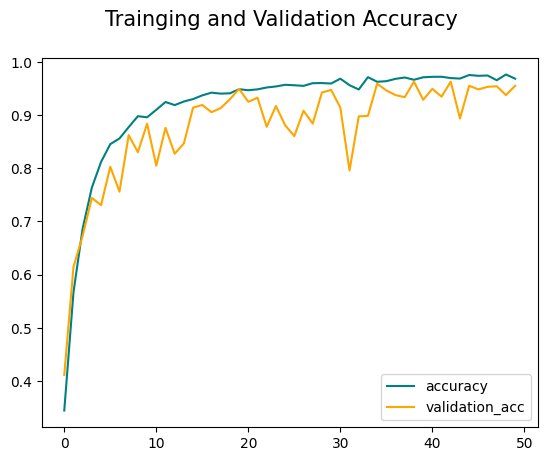

In [33]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='validation_acc')
fig.suptitle('Trainging and Validation Accuracy', fontsize=15)
plt.legend(loc='lower right')
plt.show()

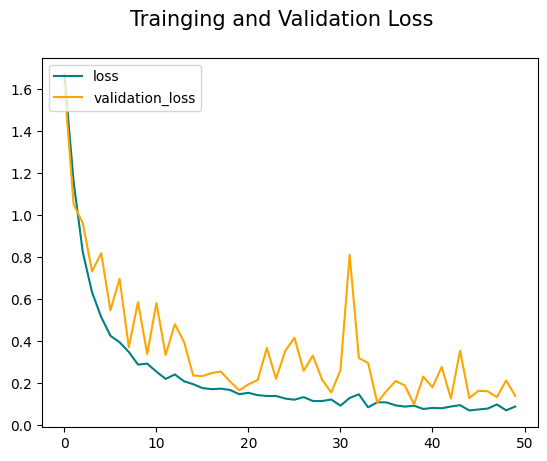

In [34]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='validation_loss')
fig.suptitle('Trainging and Validation Loss', fontsize=15)
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'Accuracy')

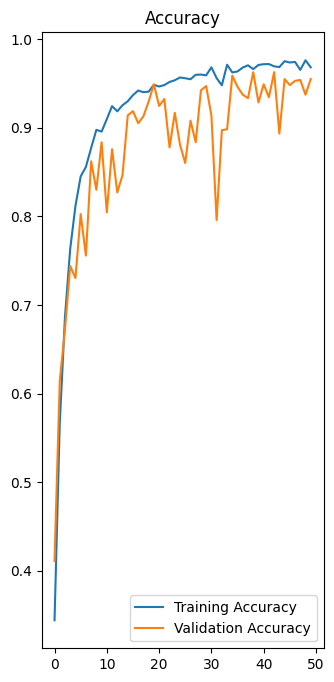

In [35]:
EPOCHS=50
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

Text(0.5, 1.0, 'Loss')

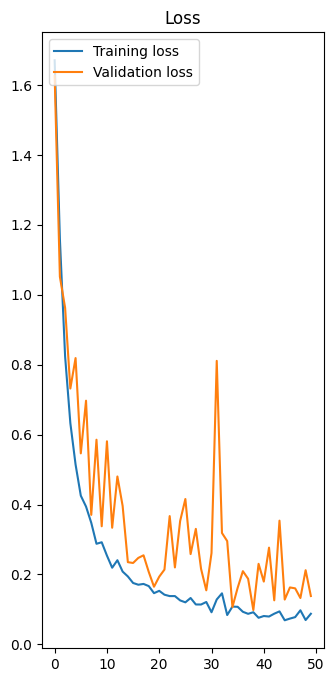

In [36]:
EPOCHS=50
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['loss'], label='Training loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper left')
plt.title('Loss')

In [37]:
len(test)

31

first image to predict
first image actual label: Tomato_Leaf_Mold
first image actual label: 3
1/1 [==============================] - 1s 727ms/step
Tomato_Leaf_Mold


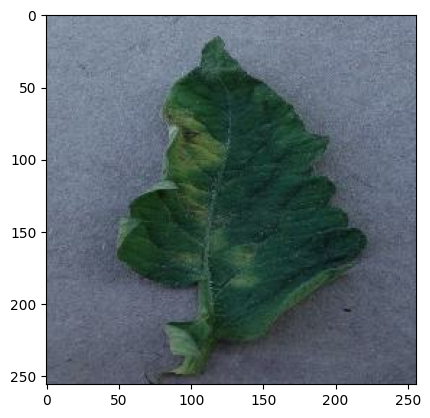

In [39]:
for images_batch, labels_batch in test.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("first image actual label:", CLASS_NAMES[first_label])
    print("first image actual label:", first_label)

    batch_prediction = model.predict(images_batch)
    print(CLASS_NAMES[np.argmax(batch_prediction[0])])

In [40]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = CLASS_NAMES[np.argmax(predictions[0])]
    confidence = round(100 * (np.argmax(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 93ms/step


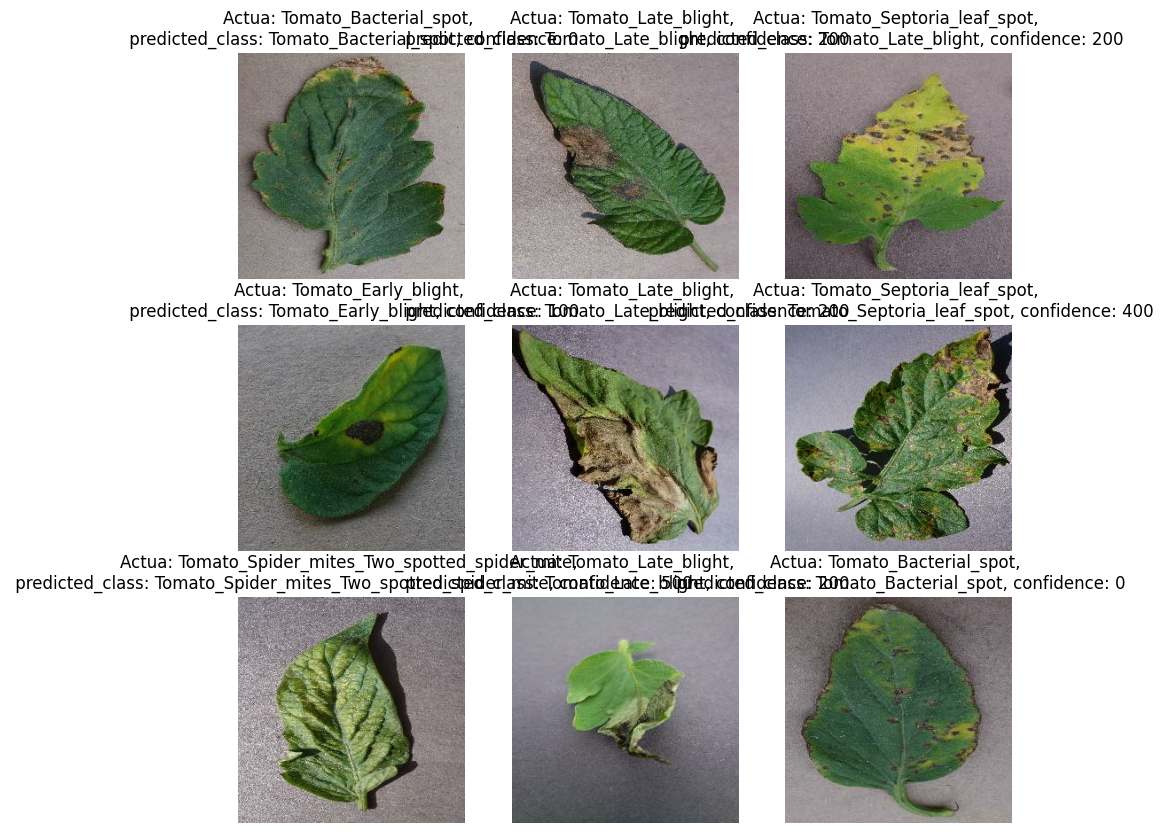

In [41]:
plt.figure(figsize=(10, 10))
for images, labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = CLASS_NAMES[labels[i]]
        plt.title(f"Actua: {actual_class}, \n predicted_class: {predicted_class}, confidence: {confidence}")

In [42]:
import os
from tensorflow.keras.models import load_model

In [43]:
model.save(os.path.join('models', 'leaf_disease_detection_cnn.h5'))

C:\Users\Kedar Matkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
new_model = load_model(os.path.join('models', 'leaf_disease_detection_cnn.h5'))

In [45]:
model.save(os.path.join('models1', 'leaf_disease_detection'))

INFO:tensorflow:Assets written to: models1\leaf_disease_detection\assets


INFO:tensorflow:Assets written to: models1\leaf_disease_detection\assets


In [46]:
model.save(os.path.join('models2', 'leaf_disease_detection_cnn.keras'))

In [5]:
print(tf.version.VERSION)

2.14.0
